In [1]:
## MP 573 Lecture 9: Sampling in N-D
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio

In [2]:
# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
sx = len(f)
sy = len(f[:])

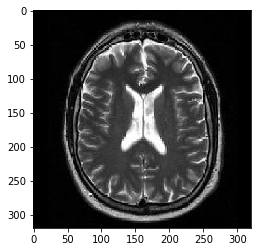

In [3]:
imgplot = plt.imshow(abs(f),cmap='gray')

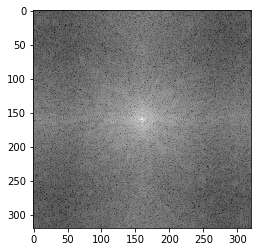

In [4]:
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
imgplot = plt.imshow(np.log(abs(fhat)),cmap='gray')

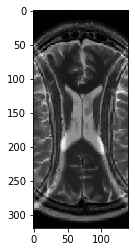

In [5]:
# Now subsample along R/L
SPACING = 2.3
f2 = np.concatenate((np.zeros((sx,10*sy)),f,np.zeros((sx,10*sy))),1)
fhat2 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))
skip = int(np.round(21*SPACING))
fhat3 = fhat2[:,1::skip]
f3 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat3)))
imgplot = plt.imshow(abs(f3),cmap='gray')

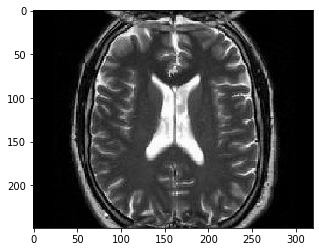

In [39]:
# Now subsample along A/P
SPACING = 1.3
f2 = np.concatenate((np.zeros((10*sx,sy)),f,np.zeros((10*sx,sy))),0)
fhat2 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))
skip = int(np.round(21*SPACING))
fhat3 = fhat2[1::skip,:]
f3 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat3)))
imgplot = plt.imshow(abs(f3),cmap='gray')